In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [4]:
df = pd.read_csv(r'data/preprocess_IndianWeatherRepository.csv')
df

,temperature_celsius,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,...,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moon_phase,moon_illumination
0,27.5,12.8,20.5,281,1008.0,29.77,0.00,0.0,67,26,...,1.7,3.1,12.6,18.5,1,2,21540,67260,Waxing Gibbous,93
1,27.5,9.6,15.5,287,1008.0,29.78,0.00,0.0,70,19,...,2.1,2.6,10.7,14.2,1,1,21600,67200,Waxing Gibbous,93
2,26.3,11.4,18.4,317,1009.0,29.78,0.00,0.0,70,51,...,0.6,1.7,16.8,20.7,2,2,21360,66840,Waxing Gibbous,93
3,25.6,10.5,16.9,297,1009.0,29.80,0.00,0.0,76,65,...,1.2,1.1,4.9,6.6,1,1,21600,67080,Waxing Gibbous,93
4,27.2,10.1,16.2,274,1009.0,29.79,0.00,0.0,74,82,...,2.2,1.8,11.4,14.8,1,1,21660,67140,Waxing Gibbous,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18050,27.0,3.8,6.1,360,1007.0,29.74,0.00,0.0,74,0,...,33.2,7.0,370.6,464.8,6,10,22260,65340,Full Moon,100
18051,24.2,2.2,3.6,28,1007.0,29.72,0.00,0.0,99,100,...,1.7,0.3,6.6,7.2,1,1,18660,61800,Full Moon,100
18052,25.1,7.8,12.6,277,1007.0,29.73,0.00,0.0,66,31,...,7.2,1.5,5.4,7.6,1,1,21720,65040,Full Moon,100
18053,22.1,6.9,11.2,266,1011.0,29.84,0.05,0.0,92,84,...,3.0,1.5,2.1,2.5,1,1,22140,65580,Full Moon,100


In [5]:
cat_features = []
for column in df.columns:
    if df[column].dtype == np.dtype('object'):
        cat_features.append(column)
cat_features

['moon_phase']

In [6]:
target = ['moon_phase']
num_features = list(set(df.columns) - set(cat_features))
cat_features.remove(*target)
features = num_features

In [7]:
pd.value_counts(df[target].values.ravel())

Waxing Crescent    3837
Waxing Gibbous     3828
Waning Crescent    3283
Waning Gibbous     3275
Full Moon          1644
New Moon           1094
First Quarter       549
Last Quarter        545
Name: count, dtype: int64

In [8]:
one_hot = pd.get_dummies(df[target])
df = df.join(one_hot)
df

,temperature_celsius,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,...,moon_phase,moon_illumination,moon_phase_First Quarter,moon_phase_Full Moon,moon_phase_Last Quarter,moon_phase_New Moon,moon_phase_Waning Crescent,moon_phase_Waning Gibbous,moon_phase_Waxing Crescent,moon_phase_Waxing Gibbous
0,27.5,12.8,20.5,281,1008.0,29.77,0.00,0.0,67,26,...,Waxing Gibbous,93,False,False,False,False,False,False,False,True
1,27.5,9.6,15.5,287,1008.0,29.78,0.00,0.0,70,19,...,Waxing Gibbous,93,False,False,False,False,False,False,False,True
2,26.3,11.4,18.4,317,1009.0,29.78,0.00,0.0,70,51,...,Waxing Gibbous,93,False,False,False,False,False,False,False,True
3,25.6,10.5,16.9,297,1009.0,29.80,0.00,0.0,76,65,...,Waxing Gibbous,93,False,False,False,False,False,False,False,True
4,27.2,10.1,16.2,274,1009.0,29.79,0.00,0.0,74,82,...,Waxing Gibbous,93,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18050,27.0,3.8,6.1,360,1007.0,29.74,0.00,0.0,74,0,...,Full Moon,100,False,True,False,False,False,False,False,False
18051,24.2,2.2,3.6,28,1007.0,29.72,0.00,0.0,99,100,...,Full Moon,100,False,True,False,False,False,False,False,False
18052,25.1,7.8,12.6,277,1007.0,29.73,0.00,0.0,66,31,...,Full Moon,100,False,True,False,False,False,False,False,False
18053,22.1,6.9,11.2,266,1011.0,29.84,0.05,0.0,92,84,...,Full Moon,100,False,True,False,False,False,False,False,False


In [9]:
one_hot.columns

Index(['moon_phase_First Quarter', 'moon_phase_Full Moon',
       'moon_phase_Last Quarter', 'moon_phase_New Moon',
       'moon_phase_Waning Crescent', 'moon_phase_Waning Gibbous',
       'moon_phase_Waxing Crescent', 'moon_phase_Waxing Gibbous'],
      dtype='object')

In [10]:
target += one_hot.columns.to_list()

In [11]:
df.columns

Index(['temperature_celsius', 'wind_mph', 'wind_kph', 'wind_degree',
       'pressure_mb', 'pressure_in', 'precip_mm', 'precip_in', 'humidity',
       'cloud', 'feels_like_celsius', 'visibility_km', 'uv_index', 'gust_kph',
       'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
       'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
       'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index',
       'air_quality_gb-defra-index', 'sunrise', 'sunset', 'moon_phase',
       'moon_illumination', 'moon_phase_First Quarter', 'moon_phase_Full Moon',
       'moon_phase_Last Quarter', 'moon_phase_New Moon',
       'moon_phase_Waning Crescent', 'moon_phase_Waning Gibbous',
       'moon_phase_Waxing Crescent', 'moon_phase_Waxing Gibbous'],
      dtype='object')

<Axes: xlabel='x', ylabel='y'>

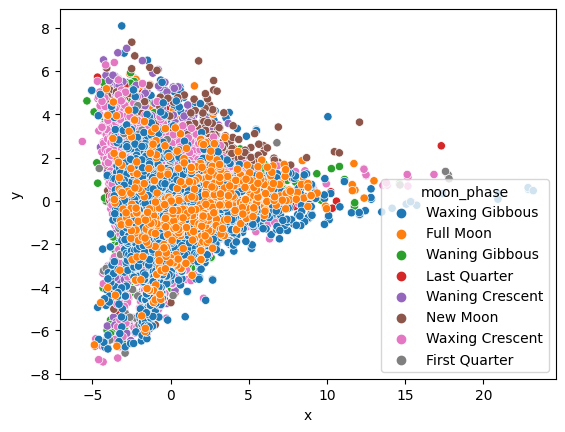

In [12]:
scaler = StandardScaler()
X = scaler.fit_transform(df[num_features].values)
pca = PCA(2)
pca_res = pca.fit_transform(X)
df['x'] = pca_res[:, 0]
df['y'] = pca_res[:, 1]
sns.scatterplot(x="x",y="y",hue=target[0], data=df)

In [32]:
from time import time

from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def bench_clusters(kmeans, data, labels):
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results = []
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    result_dict = {}
    metrics_names = ['homogeneity_score', #однородность
                     'completeness_score', #полнота
                     'v_measure_score', #среднее гармоническое между однородностью и полнотой
                     'adjusted_rand_score', #с поправкой на случайность
                     'adjusted_mutual_info_score', #скорректированная взаимная информация между двумя кластерами
                     'silhouette_score'] #средний коэффициент силуэта всех образцов
    for i, metric_name in enumerate(metrics_names):
        result_dict[metric_name] = results[i]
    
    return result_dict

## KMEANS

In [28]:
kmeans = KMeans(n_clusters=8, random_state=42, n_init='auto').fit(X)
df['kmeans'] = kmeans.predict(X)

Оценка по метрикам

In [31]:
kmeans_result = bench_clusters(kmeans=kmeans, data=df[num_features].values, labels=df[target[0]])
for name, values in kmeans_result.items():
    print(f'{name} = {values}')

homogeneity_score = 0.08121369811032282
completeness_score = 0.08280654160503725
v_measure_score = 0.08200238559755746
adjusted_rand_score = 0.04562984019395719
adjusted_mutual_info_score = 0.08132977191411205
silhouette_score = -0.05656872924342385


Экспертная оценка

In [19]:
df[num_features + ['kmeans']].groupby(by=['kmeans']).describe()

air_quality_PM10                                                  
                  count        mean         std   min      25%     50%   
kmeans                                                                   
0                1432.0   15.287709   13.582812   1.2    6.100   11.10  \
1                4570.0   21.584114   18.558702   0.7    7.200   16.50   
2                3885.0   41.892716   20.916811   3.1   25.400   39.90   
3                 248.0  340.590726  187.421243  55.2  214.175  317.30   
4                 775.0   45.559097   29.543074   0.7   18.950   44.10   
5                1112.0   51.507284   44.366585   1.4   18.775   37.45   
6                3302.0  137.374258   56.378228  50.6   93.225  125.40   
7                2731.0   17.160857   19.565889   0.8    5.300   11.50   

                        wind_mph             ... temperature_celsius         
            75%     max    count       mean  ...                 75%   max   
kmeans                                       ...                             
0        20.000    93.7   1432.0   2.840363  ...                24.3  30.0  \
1        31.400   157.6   4570.0   5.000088  ...                26.0  32.4   
2        55.900   133.6   3885.0   4.958636  ...                26.6  33.0   
3       419.300  1043.7    248.0   3.934274  ...                28.0  34.2   
4        66.300   158.7    775.0   3.656129  ...                15.7  21.5   
5        70.725   229.6   1112.0   7.084083  ...                31.2  38.3   
6       167.750   374.4   3302.0   4.018686  ...                27.7  36.3   
7        22.000   233.2   2731.0  11.578945  ...                26.6  35.1   

       wind_degree                                                             
             count        mean         std   min     25%    50%    75%    max  
kmeans                                                                         
0           1432.0  127.132682   84.163964   1.0   67.00  113.0  173.0  360.0  
1           4570.0  234.762363   81.359571   1.0  213.00  254.0  283.0  360.0  
2           3885.0  142.086744   88.823935   1.0   73.00  122.0  210.0  360.0  
3            248.0  137.423387  113.726687  10.0   38.25  109.0  230.0  360.0  
4            775.0  118.958710  104.954307   1.0   45.00   71.0  165.0  359.0  
5           1112.0  258.282374   72.721058   2.0  247.00  275.0  301.0  359.0  
6           3302.0  148.016354  104.033005   1.0   63.00  117.0  242.0  360.0  
7           2731.0  232.635665   64.168604   1.0  223.00  252.0  270.0  355.0  

[8 rows x 200 columns]

In [20]:
pd.value_counts(df[target[0]].values.ravel())

Waxing Crescent    3837
Waxing Gibbous     3828
Waning Crescent    3283
Waning Gibbous     3275
Full Moon          1644
New Moon           1094
First Quarter       549
Last Quarter        545
Name: count, dtype: int64

<Axes: xlabel='x', ylabel='y'>

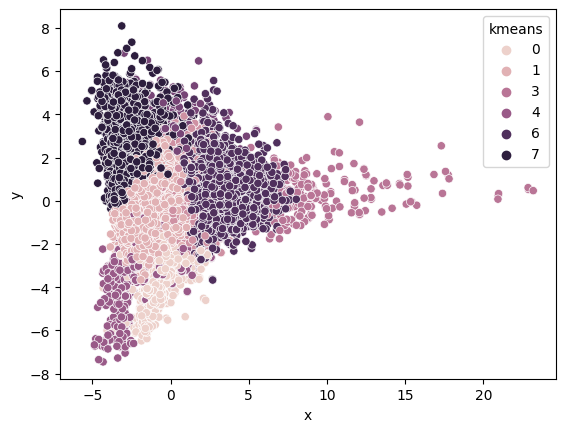

In [21]:
sns.scatterplot(x="x",y="y",hue="kmeans", data=df)

## DBSCAN

In [34]:
n = df.shape[0]
perc = 0.9
db = DBSCAN(eps=0.3, min_samples=3).fit(df[num_features].loc[:int(n*perc)])
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Предполагаемое количество кластеров: %d" % n_clusters_)
print("Предполагаемое количество шумов: %d" % n_noise_)

Предполагаемое количество кластеров: 38
Предполагаемое количество шумов: 16135


In [35]:
df.loc[:int(n*perc),'dbscan'] =  DBSCAN(eps=0.3, min_samples=3).fit_predict(df[num_features].loc[:int(n*perc)])

In [42]:
df[num_features + ['dbscan']].groupby(by=['dbscan']).describe()

air_quality_PM10                                                         
                  count        mean           std    min    25%    50%    75%   
dbscan                                                                          
-1.0            16135.0   46.707698  5.815968e+01    0.7   11.6   28.1   59.7  \
 0.0                4.0  251.800000  0.000000e+00  251.8  251.8  251.8  251.8   
 1.0                3.0   48.400000  0.000000e+00   48.4   48.4   48.4   48.4   
 2.0                3.0   17.800000  0.000000e+00   17.8   17.8   17.8   17.8   
 3.0                3.0   77.300000  0.000000e+00   77.3   77.3   77.3   77.3   
 4.0                3.0   32.700000  0.000000e+00   32.7   32.7   32.7   32.7   
 5.0                3.0   14.300000  2.175584e-15   14.3   14.3   14.3   14.3   
 6.0                3.0   50.200000  8.702336e-15   50.2   50.2   50.2   50.2   
 7.0                3.0    3.900000  0.000000e+00    3.9    3.9    3.9    3.9   
 8.0                3.0   55.700000  8.702336e-15   55.7   55.7   55.7   55.7   
 9.0                3.0   67.400000  0.000000e+00   67.4   67.4   67.4   67.4   
 10.0               3.0    4.100000  0.000000e+00    4.1    4.1    4.1    4.1   
 11.0               3.0   97.600000  1.740467e-14   97.6   97.6   97.6   97.6   
 12.0               3.0   15.800000  2.175584e-15   15.8   15.8   15.8   15.8   
 13.0               3.0   15.500000  0.000000e+00   15.5   15.5   15.5   15.5   
 14.0               3.0   20.500000  0.000000e+00   20.5   20.5   20.5   20.5   
 15.0               3.0   43.800000  8.702336e-15   43.8   43.8   43.8   43.8   
 16.0               3.0    7.400000  1.087792e-15    7.4    7.4    7.4    7.4   
 17.0               3.0   12.700000  2.175584e-15   12.7   12.7   12.7   12.7   
 18.0               3.0   52.000000  0.000000e+00   52.0   52.0   52.0   52.0   
 19.0               3.0   35.400000  0.000000e+00   35.4   35.4   35.4   35.4   
 20.0               3.0   23.600000  4.351168e-15   23.6   23.6   23.6   23.6   
 21.0               3.0  112.300000  0.000000e+00  112.3  112.3  112.3  112.3   
 22.0               3.0    8.800000  0.000000e+00    8.8    8.8    8.8    8.8   
 23.0               3.0   44.700000  8.702336e-15   44.7   44.7   44.7   44.7   
 24.0               3.0   24.400000  4.351168e-15   24.4   24.4   24.4   24.4   
 25.0               3.0   61.400000  0.000000e+00   61.4   61.4   61.4   61.4   
 26.0               3.0   40.700000  0.000000e+00   40.7   40.7   40.7   40.7   
 27.0               3.0   59.100000  0.000000e+00   59.1   59.1   59.1   59.1   
 28.0               3.0   27.000000  0.000000e+00   27.0   27.0   27.0   27.0   
 29.0               3.0    7.200000  0.000000e+00    7.2    7.2    7.2    7.2   
 30.0               3.0   34.400000  0.000000e+00   34.4   34.4   34.4   34.4   
 31.0               3.0   46.200000  8.702336e-15   46.2   46.2   46.2   46.2   
 32.0               3.0    4.900000  0.000000e+00    4.9    4.9    4.9    4.9   
 33.0               3.0   28.900000  4.351168e-15   28.9   28.9   28.9   28.9   
 34.0               3.0    6.500000  0.000000e+00    6.5    6.5    6.5    6.5   
 35.0               3.0   60.700000  8.702336e-15   60.7   60.7   60.7   60.7   
 36.0               3.0    7.500000  0.000000e+00    7.5    7.5    7.5    7.5   
 37.0               3.0  130.700000  0.000000e+00  130.7  130.7  130.7  130.7   

               wind_mph            ... temperature_celsius       wind_degree   
           max    count      mean  ...                 75%   max       count   
dbscan                             ...                                         
-1.0    1043.7  16135.0  5.876207  ...                27.0  38.3     16135.0  \
 0.0     251.8      4.0  2.200000  ...                30.0  30.0         4.0   
 1.0      48.4      3.0  4.300000  ...                27.0  27.0         3.0   
 2.0      17.8      3.0  5.100000  ...                25.5  25.5         3.0   
 3.0      77.3      3.0  2.200000  ...      

In [38]:
dbscan_results = bench_clusters(db, df[num_features].loc[:int(n*perc)], labels=df.loc[:int(n*perc), target[0]])
for name, values in dbscan_results.items():
    print(f'{name} = {values}')

homogeneity_score = 0.06864011631273441
completeness_score = 0.19783611673693718
v_measure_score = 0.10191898848368838
adjusted_rand_score = 4.799107886884161e-05
adjusted_mutual_info_score = 0.053418383803754944
silhouette_score = -0.6322164301771409


<Axes: xlabel='x', ylabel='y'>

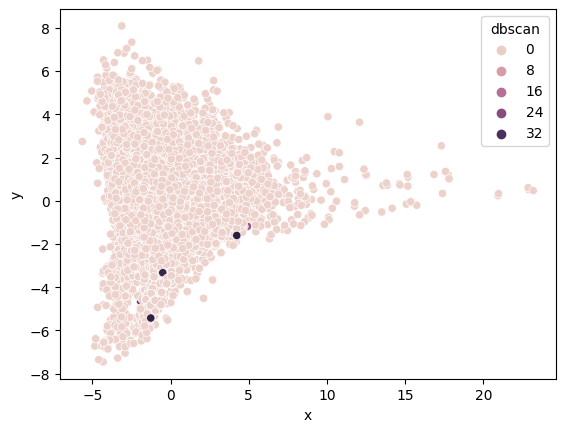

In [39]:
sns.scatterplot(x="x",y="y",hue="dbscan", data=df.loc[:n*perc])

## Иерархическая

In [40]:
from sklearn.cluster import AgglomerativeClustering
n = df.shape[0]
perc = 0.9
ward = AgglomerativeClustering(n_clusters=8, linkage="ward").fit(df.loc[:perc*n, num_features])
label = ward.labels_
label.size

16250

In [41]:
df['hierarh'] = ward.fit_predict(X)

In [43]:
df[num_features + ['hierarh']].groupby(by=['hierarh']).describe()

air_quality_PM10                                                
                   count        mean         std   min    25%     50%   
hierarh                                                                 
0                 2009.0  174.134893  110.034818  21.2  105.2  154.60  \
1                 3075.0   24.202699   24.905755   0.8    7.4   15.70   
2                  483.0   20.210145   19.089807   1.1    6.0   15.00   
3                 1528.0   61.584228   56.060811   1.4   20.5   42.25   
4                  890.0   50.238539   33.034068   0.7   23.7   47.70   
5                 3743.0   67.143708   42.922438   3.1   33.4   57.30   
6                 3128.0   29.479795   21.499206   0.8   13.9   25.40   
7                 3199.0   13.893435   14.457656   0.7    4.3    9.20   

                         wind_mph             ... temperature_celsius         
             75%     max    count       mean  ...                 75%   max   
hierarh                                       ...                             
0        213.800  1043.7   2009.0   3.808661  ...               27.10  34.2  \
1         32.200   205.1   3075.0   3.711089  ...               26.00  32.0   
2         26.950   158.4    483.0   7.024845  ...               25.05  31.0   
3         91.225   323.7   1528.0   6.125589  ...               30.50  35.3   
4         72.800   175.3    890.0   3.641011  ...               16.80  26.3   
5         90.100   257.1   3743.0   5.115469  ...               27.20  38.3   
6         40.425   168.4   3128.0   5.080850  ...               26.40  33.1   
7         18.500   159.1   3199.0  10.210660  ...               26.10  32.0   

        wind_degree                                                            
              count        mean         std   min    25%    50%    75%    max  
hierarh                                                                        
0            2009.0  147.454455  113.913489   1.0   50.0  109.0  259.0  360.0  
1            3075.0  157.582114   97.619033   1.0   75.0  147.0  240.0  360.0  
2             483.0  189.650104  101.374085   1.0   86.0  233.0  270.0  360.0  
3            1528.0  229.008508   93.695262   2.0  179.0  263.0  298.0  360.0  
4             890.0  113.066292  102.453474   1.0   45.0   68.0  138.0  359.0  
5            3743.0  140.136789   84.934958   1.0   77.0  120.0  196.0  359.0  
6            3128.0  234.833760   84.435039   1.0  216.0  256.0  286.0  360.0  
7            3199.0  238.336668   56.007449  10.0  226.0  253.0  270.0  355.0  

[8 rows x 200 columns]

In [45]:
h_results = bench_clusters(ward, df[num_features].loc[:int(n*perc)], labels=df.loc[:int(n*perc), target[0]])
for name, values in h_results.items():
    print(f'{name} = {values}')

homogeneity_score = 0.07419540886762205
completeness_score = 0.08707658496614461
v_measure_score = 0.08012157189572255
adjusted_rand_score = 0.0335980718588023
adjusted_mutual_info_score = 0.07931116677641882
silhouette_score = -0.04882367098256186


<Axes: xlabel='x', ylabel='y'>

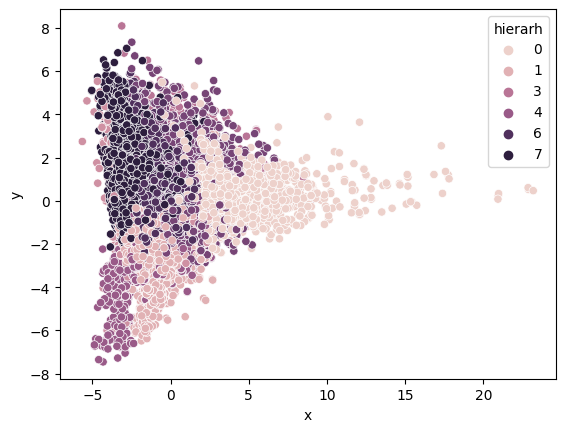

In [46]:
sns.scatterplot(x="x",y="y",hue="hierarh", data=df)